In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from numba import jit
from helper_functions import *

### get vf

### plots

In [17]:
#PARAMETROS
K = 4 * np.pi / 3
hoppings = np.linspace(2.7, 3, 10)
vfs = [hopping * np.sqrt(3) / 2 for hopping in hoppings]
i = 8
t = 0.11
U = 0.08
num_cells = None

theta = np.arccos((3 * i ** 2 + 3 * i + 0.5) / (3 * i ** 2 + 3 * i + 1))
deltaK = 2 * K * np.sin(theta / 2)
deltaK_vec = np.array([0, deltaK])

#DEFINE LOS VECTORES REALES Y RECIPROCOS
G1 = deltaK * np.array([np.sqrt(3)/2, 1/2])
G2 = deltaK * (np.array([-np.sqrt(3)/2, 1/2]))-G1
Gs = (G1, G2)

q0 = deltaK * np.array([0, -1])
q1 = deltaK * np.array([np.sqrt(3)/2, 1/2])
q2 = deltaK * np.array([-np.sqrt(3)/2, 1/2])
Qs = (q0, q1, q2)

print(f'theta: {np.degrees(theta)}')
print(f'deltaK: {deltaK}')

theta: 3.8902381690076835
deltaK: 0.284353607503172


In [18]:
ks = generate_macpath(1000, deltaK, Qs, starting_cell=(0, 0))
kxs = ks[:, 0]
kys = ks[:, 1]
xs = np.linspace(-1, 1, len(kxs))

Es = np.array([np.array([band_energy(kxs[i], kys[i], Qs, K, t, theta, vf, N=num_cells, U=U) for i in range(len(kxs))]) for vf in [2.7]])

In [19]:
print(Es.shape)

(1, 1000, 36)


18


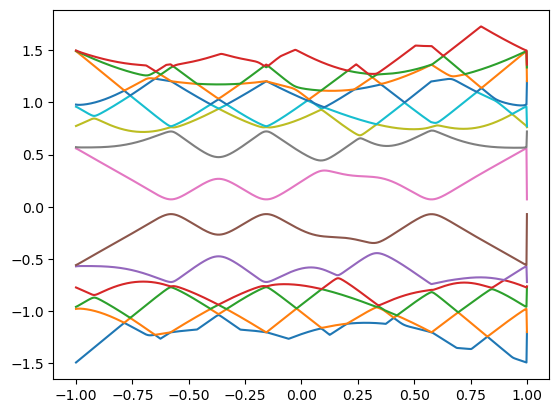

In [20]:
bands_show = 7
v_i = 0

if not num_cells:
    midband = 18
    # H = populate_hamiltonian(0, 0, Qs, K, t, theta, vfs[v_i], U)
    # N = (H.shape[0] / 4) ** 0.5
    # midband = H.shape[0] // 2 - 1
else:
    midband = 4 * num_cells ** 2 // 2 - 1

Es_reduced = Es[v_i,:, midband - bands_show + 1: midband + bands_show + 1]

print(midband)
plt.plot(xs[:], Es_reduced)
plt.show()

In [21]:


grad_at_cone(Es[:, midband], xs, deltaK) / vf

TypeError: grad_at_cone() missing 1 required positional argument: 'deltaK'

In [11]:
# from mpl_toolkits.mplot3d import axes3d

# fig = plt.figure()
# ax = plt.axes(projection='3d')

# kx = np.linspace(-1, 1, 100)
# ky = np.linspace(-1, 1, 100)

# # Create a meshgrid of kx and ky values
# kx, ky = np.meshgrid(kx, ky)

# # Evaluate H for each kx and ky value
# H_vals_hole = np.array([band_energy(kx[i, j], ky[i, j], Qs, K, t, theta, vf, N=num_cells)[midband] for i in range(kx.shape[0]) for j in range(kx.shape[1])])
# H_vals_elec = np.array([band_energy(kx[i, j], ky[i, j], Qs, K, t, theta, vf, N=num_cells)[midband + 1] for i in range(kx.shape[0]) for j in range(kx.shape[1])])

# # # Reshape H_vals to match the shape of kx and ky
# H_vals_hole = H_vals_hole.reshape(kx.shape)
# H_vals_elec = H_vals_elec.reshape(kx.shape)

# # Plot the 3D surface
# ax.plot_surface(kx, ky, H_vals_hole, cmap='viridis')
# ax.plot_surface(kx, ky, H_vals_elec, cmap='viridis')

# # Set labels and title
# ax.set_xlabel('kx/deltaK')
# ax.set_ylabel('ky/deltaK')
# ax.set_zlabel('H')
# ax.set_title('3D Plot of H')

# # Show the plot
# plt.show()

In [12]:
# Calculate the number of points to find
num_points = 6

# Calculate the minimum values of H_vals_elec
min_indices = np.argpartition(H_vals_elec.flatten(), num_points)[:num_points]

# Get the corresponding kx and ky values
min_kx = kx.flatten()[min_indices]
min_ky = ky.flatten()[min_indices]

# Print the results
for i in range(num_points):
    print(f"Point {i+1}: kx = {min_kx[i]}, ky = {min_ky[i]}")

    midpoint_1_2 = (min_kx[0] + min_kx[1]) / 2, (min_ky[0] + min_ky[1]) / 2
    midpoint_3_4 = (min_kx[2] + min_kx[3]) / 2, (min_ky[2] + min_ky[3]) / 2

    print("Midpoint of first and second points:", midpoint_1_2)
    print("Midpoint of third and fourth points:", midpoint_3_4)

NameError: name 'H_vals_elec' is not defined

[]

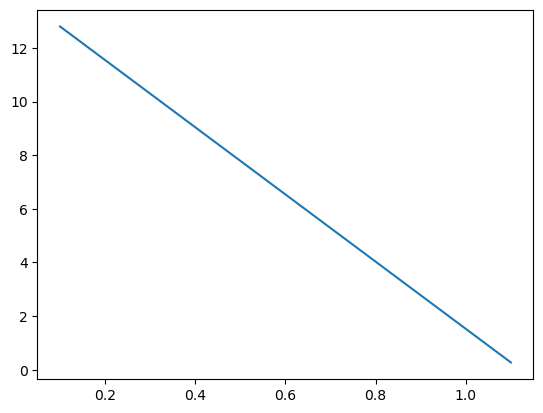

In [2]:
import numpy as np
from matplotlib import pyplot as plt

fldr_time = '20240919_133524'

alphas = np.load('/Users/sarce/Desktop/repos/csic2024/alphas_' + fldr_time +  '_csic2024/alphas.npy')
thetas = np.linspace(1.1, 0.1, len(alphas))


plt.plot(thetas, alphas)
plt.plot()

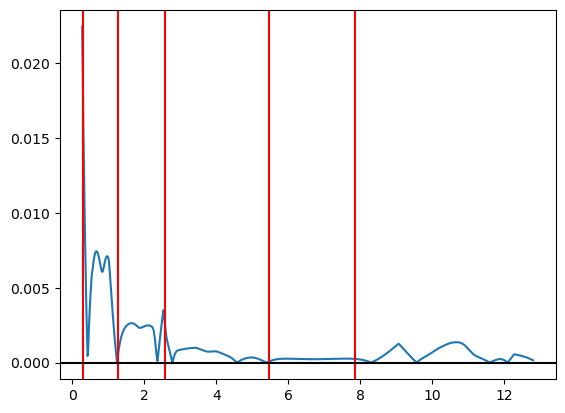

In [3]:
import numpy as np
import matplotlib.pyplot as plt


errm = 1.35 #multiplicative error
vfK = 3.1 * 4 * np.pi * np.sqrt(3)/6
macdonal_magics = [0.2, 0.24, 0.35, 0.5, 1.05]
magic_alphas = [(0.11 / (vfK * 2 * np.sin(np.radians(theta) / 2))) ** 2 for theta in macdonal_magics]

vs = np.load('/Users/sarce/Desktop/repos/csic2024/alphas_' + fldr_time + '_csic2024/renorm_vs.npy')
vs_abs = np.array([np.abs(vs[i]) for i in range(len(vs))])

plt.plot(alphas[:], vs_abs[:])
for magic_alpha in magic_alphas:
    plt.axvline(x=magic_alpha, color='red')
plt.axhline(y = 0, color='black')

plt.show()

In [4]:
import numpy as np

vfK = 2.7 * 4 * np.pi * np.sqrt(3)/6
macdonal_magics = [0.18, 0.24, 0.35, 0.5, 1.2]
[(0.11 / (vfK * 2 * np.sin(np.radians(theta) / 2))) ** 2 for theta in macdonal_magics]

[12.779679778524459,
 7.188574473926108,
 3.3801026273845944,
 1.6562556479857664,
 0.28755306960961224]

In [5]:
theta1, theta2 = 2, 0.1

vfK = 2.7 * 4 * np.pi * np.sqrt(3)/6

print((0.11 / (vfK * 2 * np.sin(np.radians(theta1) / 2)))**2, (0.11 / (vfK * 2 * np.sin(np.radians(theta2) / 2)))**2)

0.10352583256512675 41.40613893808509
